In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [55]:
data = pd.read_csv("framingham.csv")

In [56]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [57]:
data.shape

(4240, 16)

In [58]:
data.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [59]:
data.shape

(4240, 16)

### Histogram

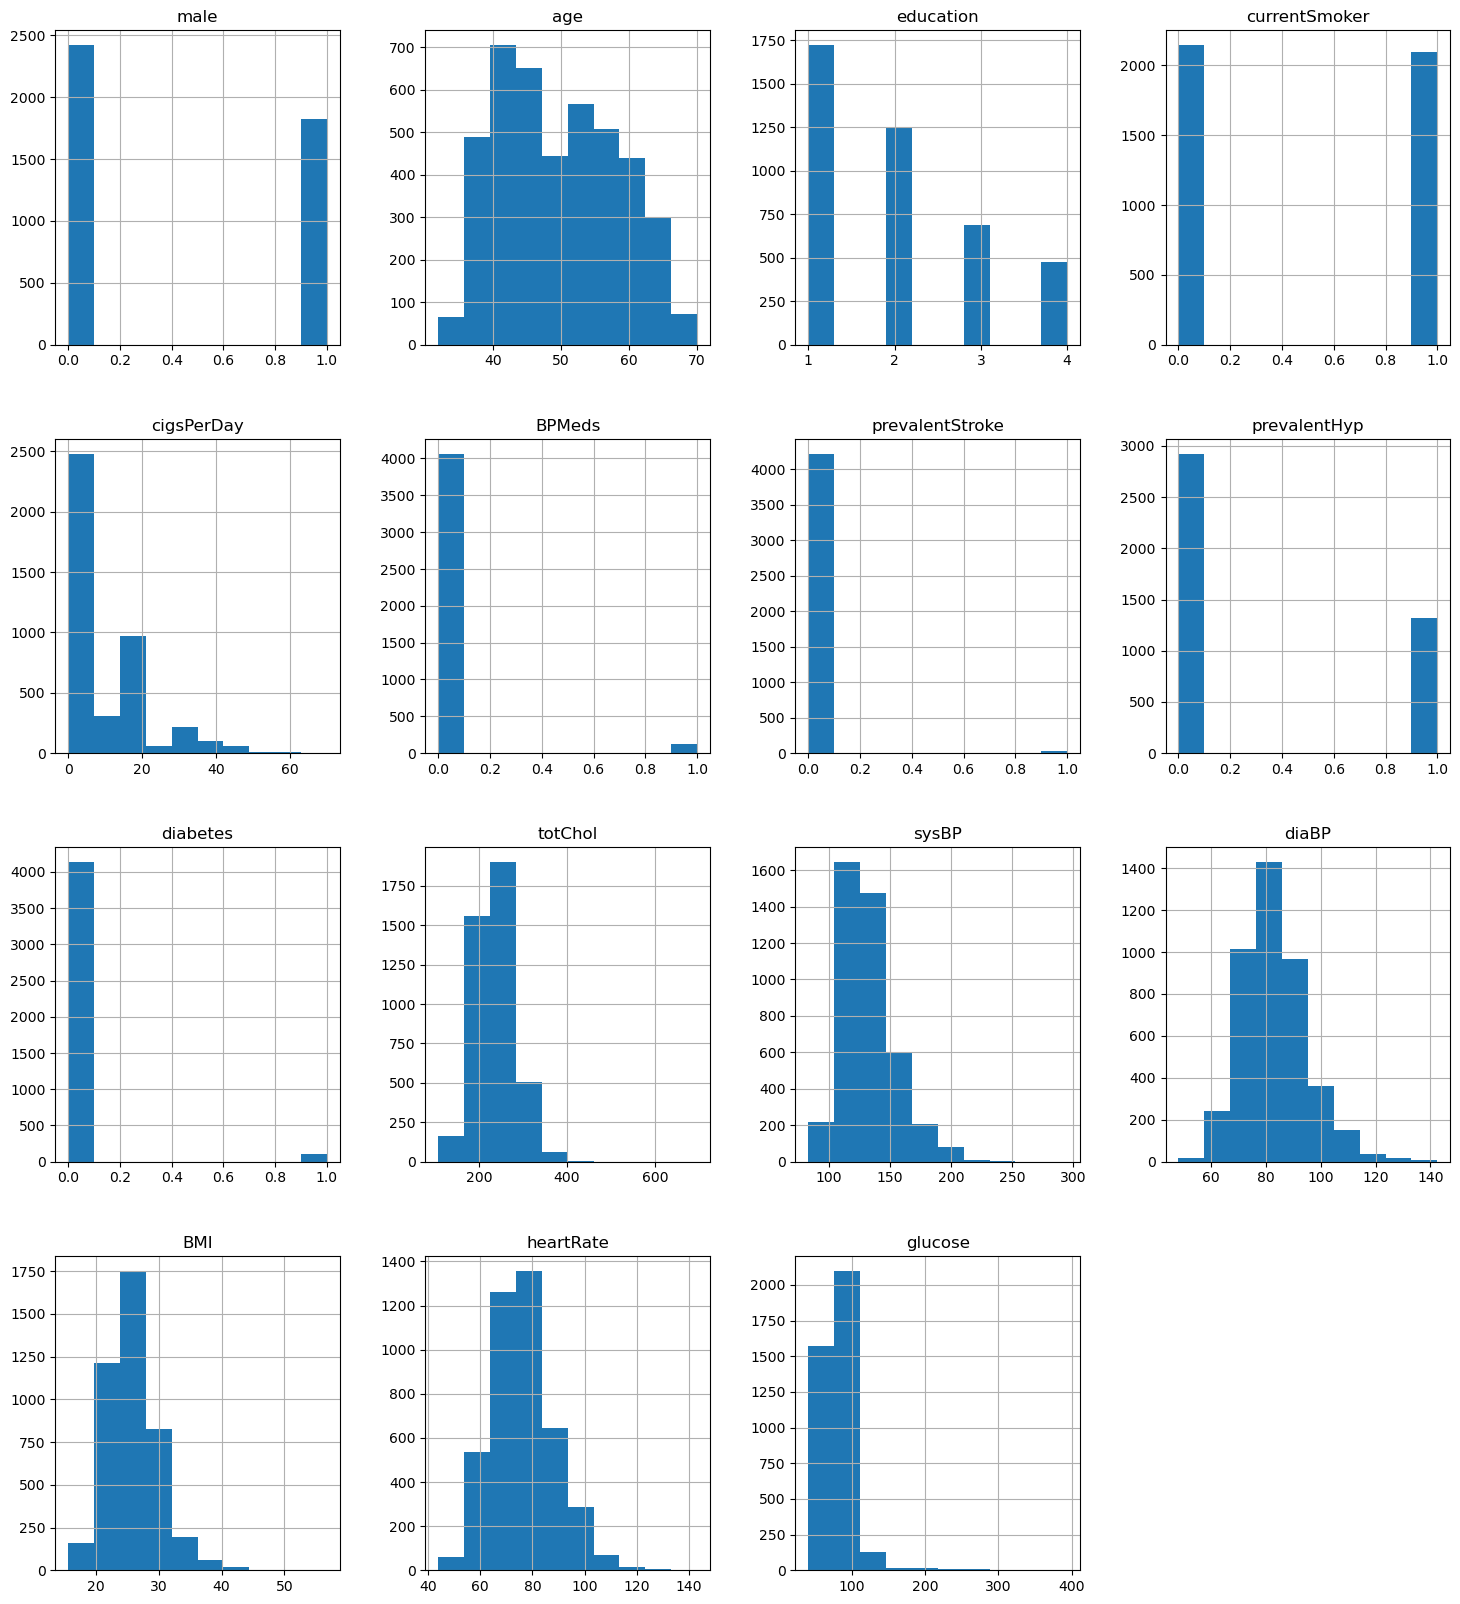

In [60]:
data_without_chd = data.drop(columns=['TenYearCHD'])
data_without_chd.hist(bins=10, figsize=(18, 20))
plt.show()

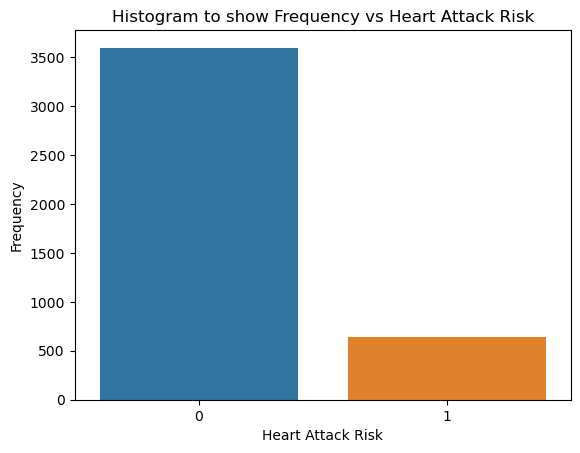

In [61]:
sns.countplot(x='TenYearCHD', data=data)
plt.xlabel('Heart Attack Risk')
plt.ylabel('Frequency')
plt.title('Histogram to show Frequency vs Heart Attack Risk')
plt.show()

In [63]:
# features = ['Patient ID', 'Age', 'Sex',	'Cholesterol', 'Blood Pressure', 'Heart Rate',
#             'Diabetes',	'Family History', 'Smoking', 'Obesity',	'Alcohol Consumption',
#             'Exercise Hours Per Week', 'Diet', 'Previous', 'Heart Problems', 'Medication Use',
#             'Stress Level',	'Sedentary Hours Per Day', 'Income', 'BMI',	'Triglycerides',
#             'Physical Activity Days Per Week',	'Sleep Hours Per Day',	'Country',	'Continent',
#             'Hemisphere']

# features = ['male',	'age', 'education',	'currentSmoker', 'cigsPerDay', 'BPMeds',
#             'prevalentStroke',	'prevalentHyp',	'diabetes',	'totChol', 'sysBP',	
#             'diaBP', 'BMI',	'heartRate', 'glucose']

# for feature in features:
#     sns.barplot(x=feature, y='Population', hue='TenYearCHD', data=data)
#     plt.title(f'Heart Attack Risk vs {feature}')
#     plt.show()

### Scatter Plot

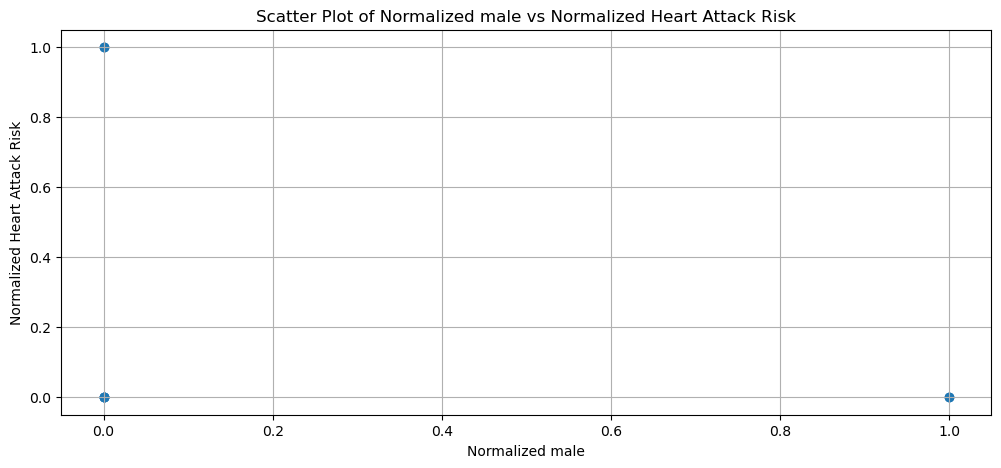

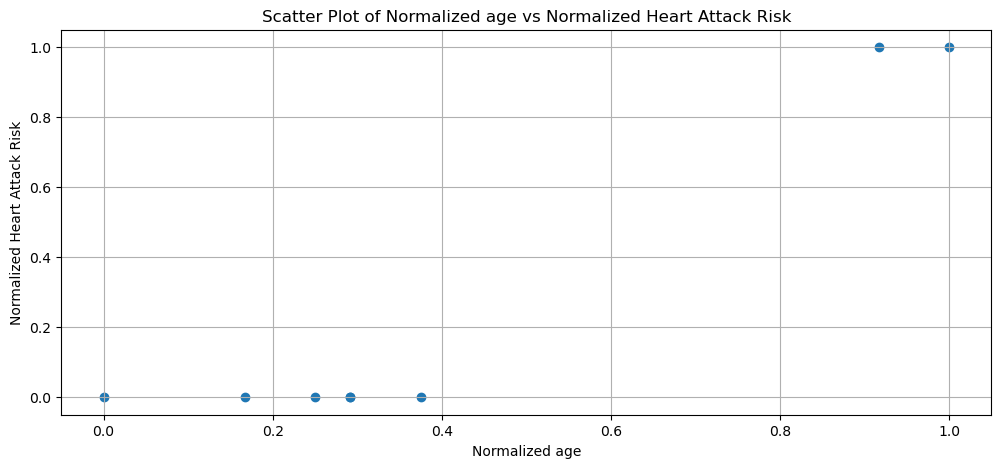

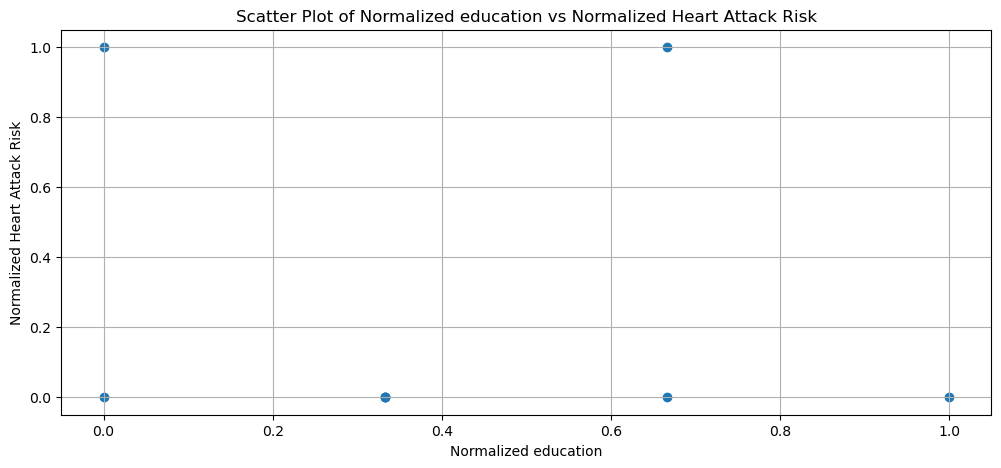

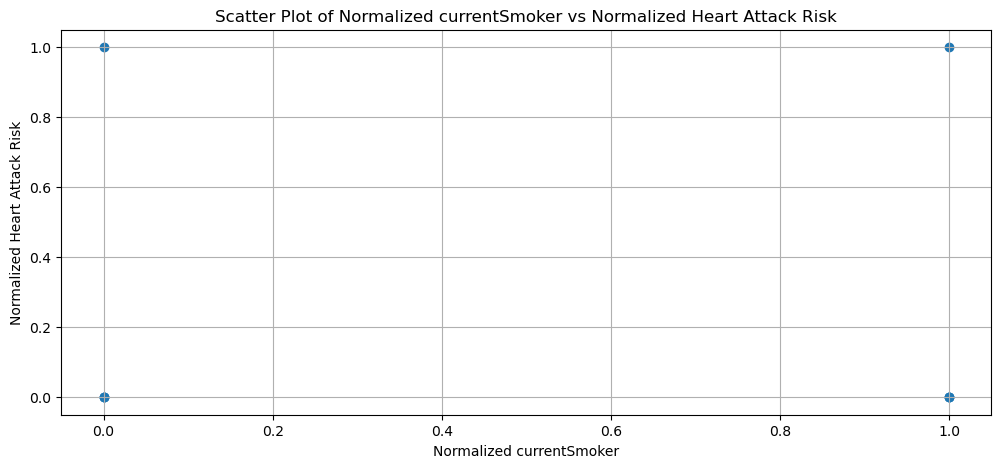

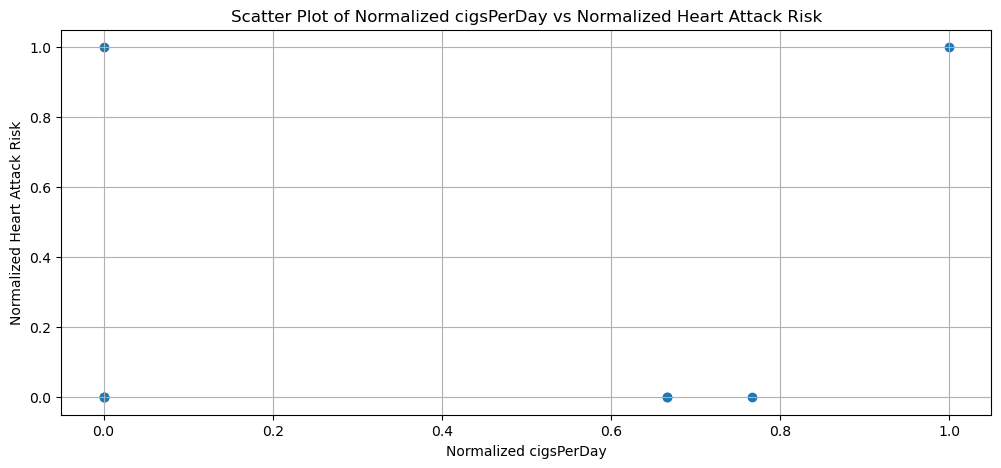

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20904\2195545027.py:17: RuntimeWarning: invalid value encountered in divide
  x_normalized = (x_values - np.min(x_values)) / (np.max(x_values) - np.min(x_values))


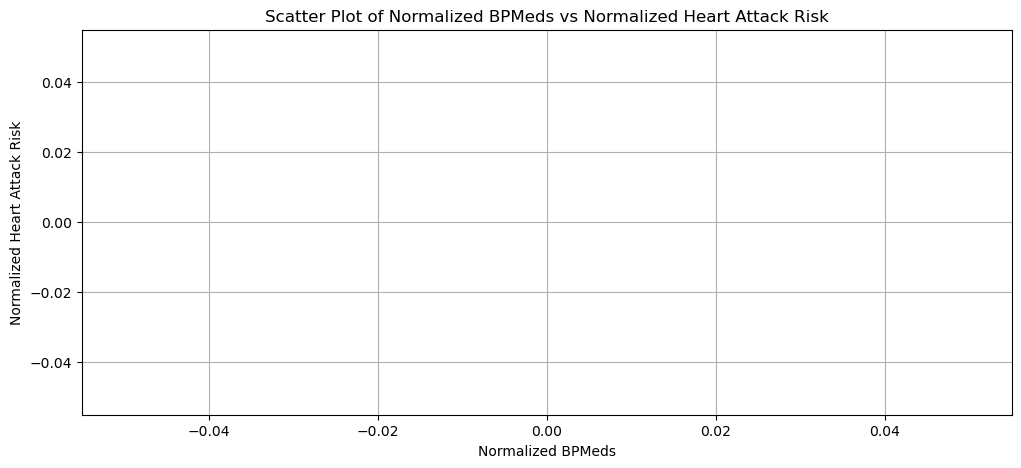

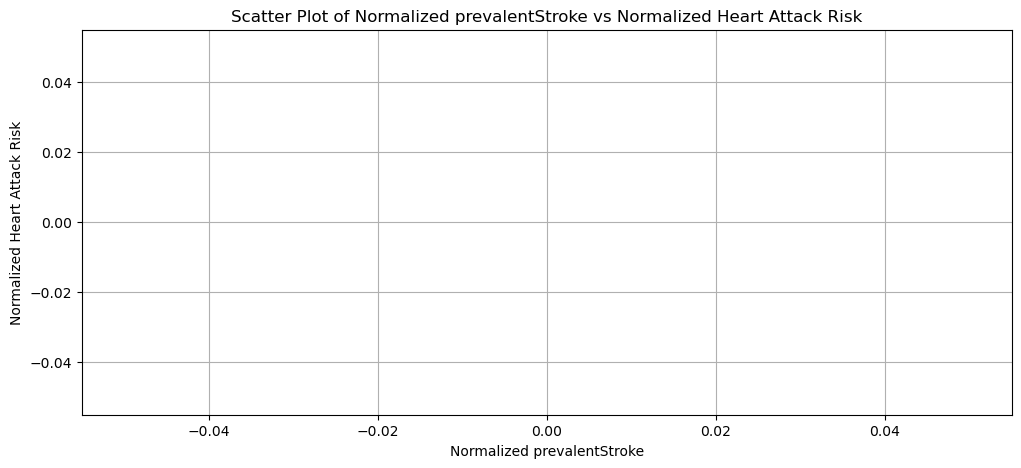

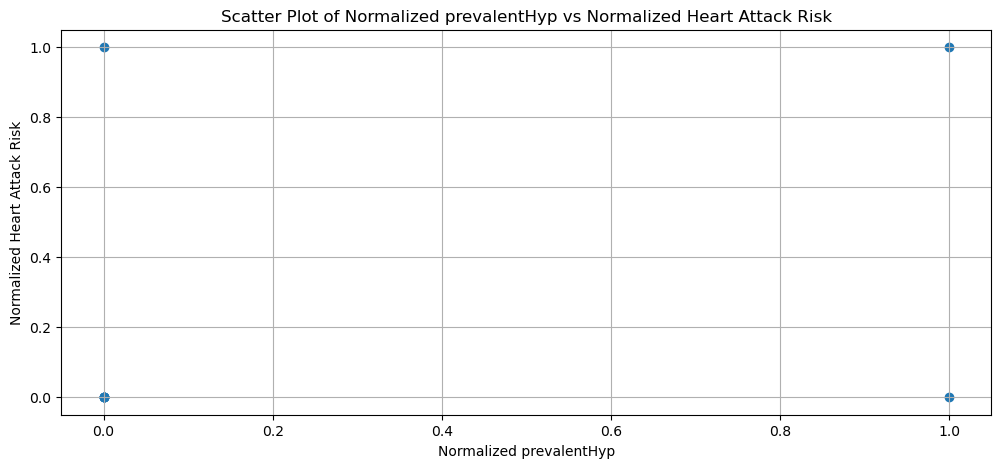

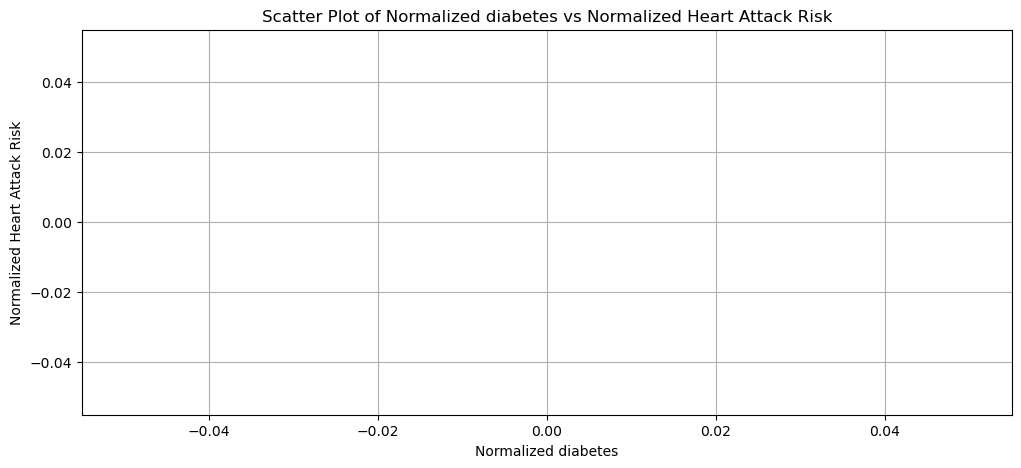

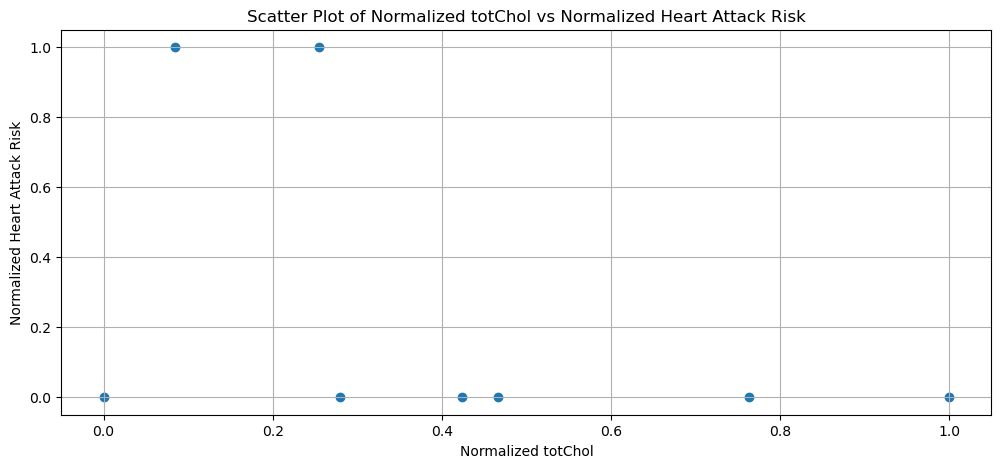

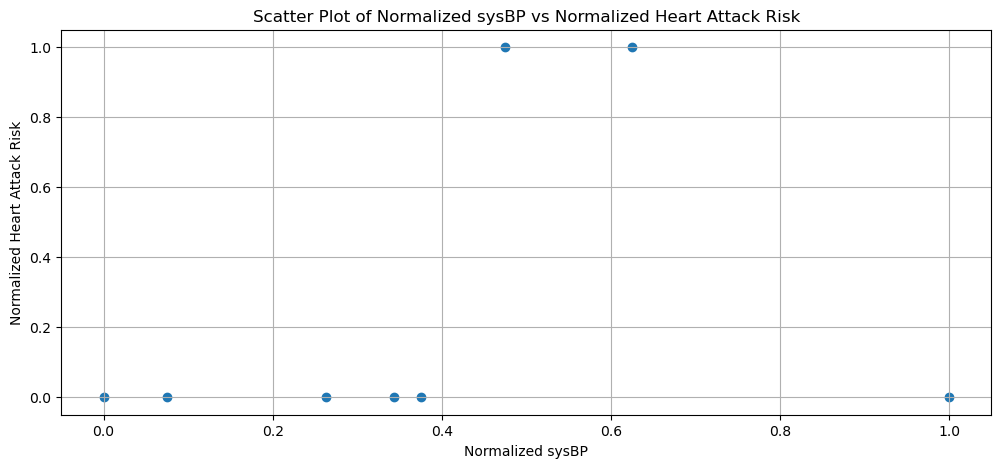

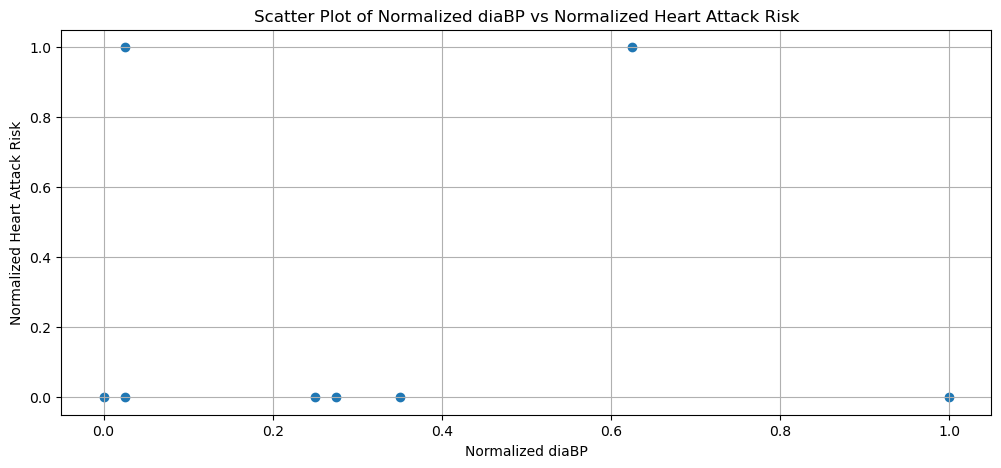

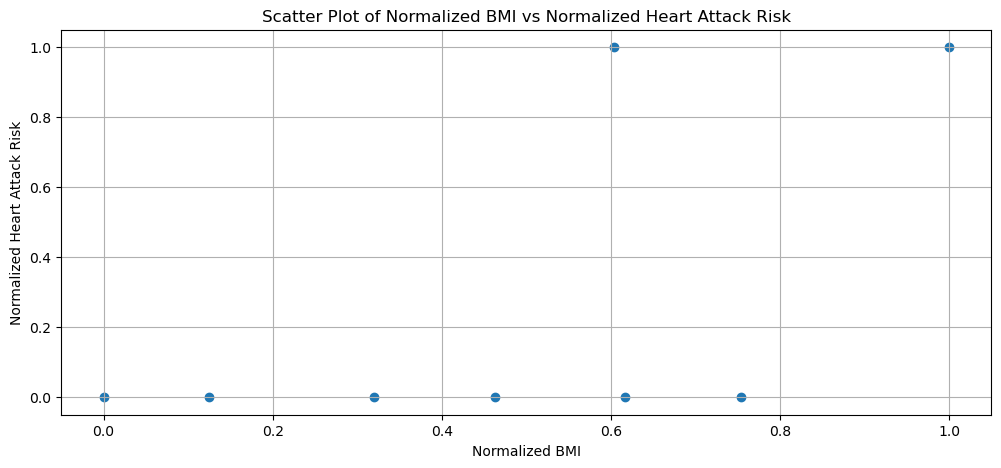

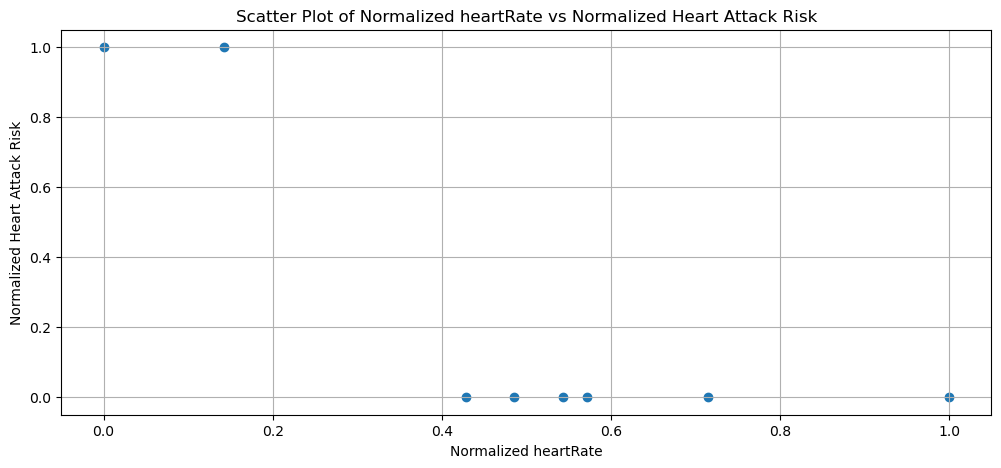

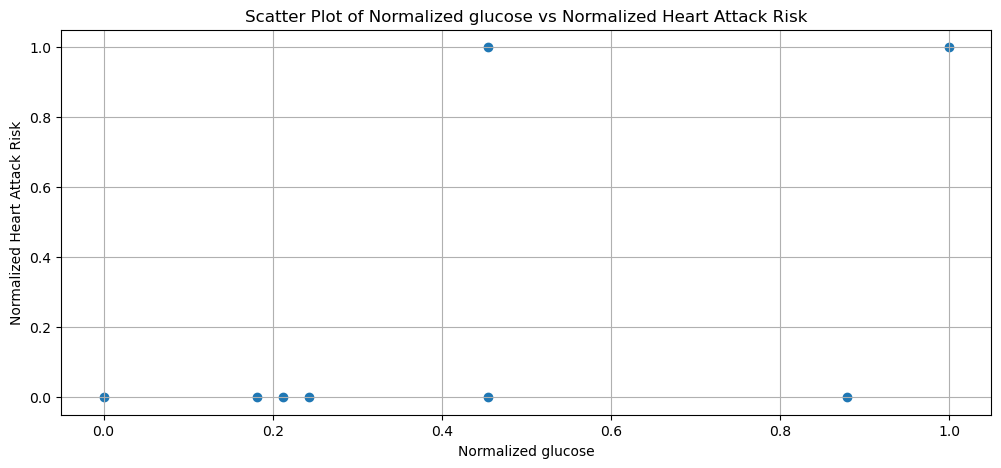

In [65]:
# Assuming df is your dataframe and 'TenYearCHD' is the target column
for col in data.columns:
    if col != 'TenYearCHD':  # Ensure you do not plot 'TenYearCHD' against itself
        # Select the first 8 rows
        x_values = df[col].values[:8]
        y_values = df['TenYearCHD'].values[:8]
        
        # Convert to numeric (if possible)
        try:
            x_values = x_values.astype(float)
            y_values = y_values.astype(float)
        except ValueError:
            print(f"Skipping column {col} as it contains non-numeric data.")
            continue
        
        # Normalize the actual data values (Min-Max normalization)
        x_normalized = (x_values - np.min(x_values)) / (np.max(x_values) - np.min(x_values))
        y_normalized = (y_values - np.min(y_values)) / (np.max(y_values) - np.min(y_values))
        
        # Plot the values
        plt.figure(figsize=(12, 5))
        plt.scatter(x=x_normalized, y=y_normalized)
        plt.xlabel(f'Normalized {col}')
        plt.ylabel('Normalized Heart Attack Risk')
        plt.title(f'Scatter Plot of Normalized {col} vs Normalized Heart Attack Risk')
        plt.grid(True)
        plt.show()


### Unique Value Analysis

In [68]:
for i in list(data.columns):
    print("{} -- {}".format(i, data[i].value_counts().shape[0]))

male -- 2
age -- 39
education -- 4
currentSmoker -- 2
cigsPerDay -- 33
BPMeds -- 2
prevalentStroke -- 2
prevalentHyp -- 2
diabetes -- 2
totChol -- 248
sysBP -- 234
diaBP -- 146
BMI -- 1364
heartRate -- 73
glucose -- 143
TenYearCHD -- 2


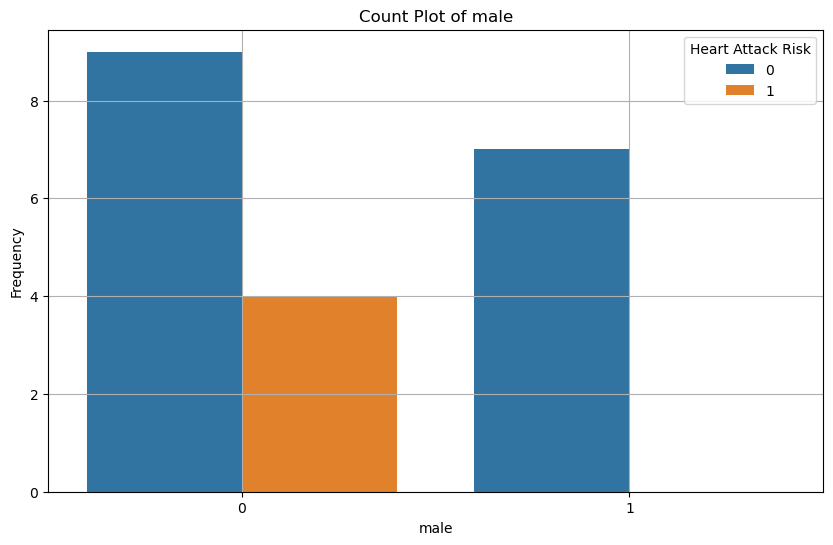

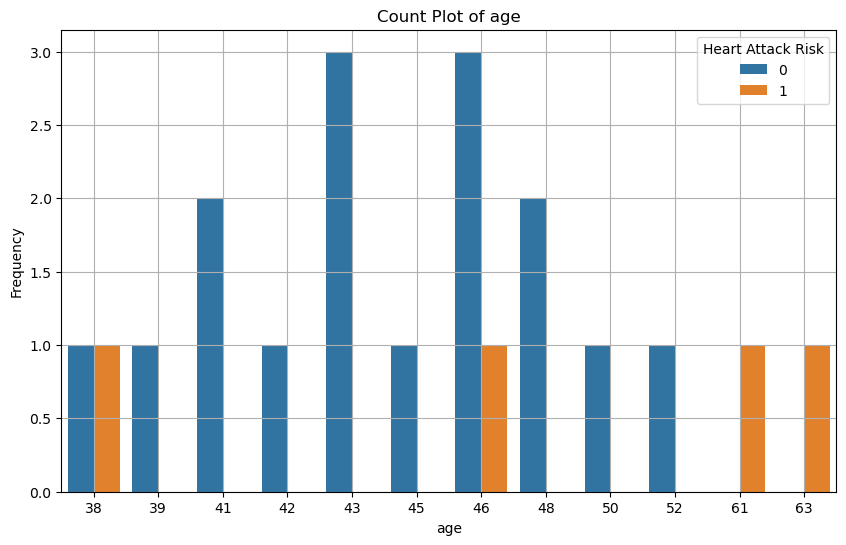

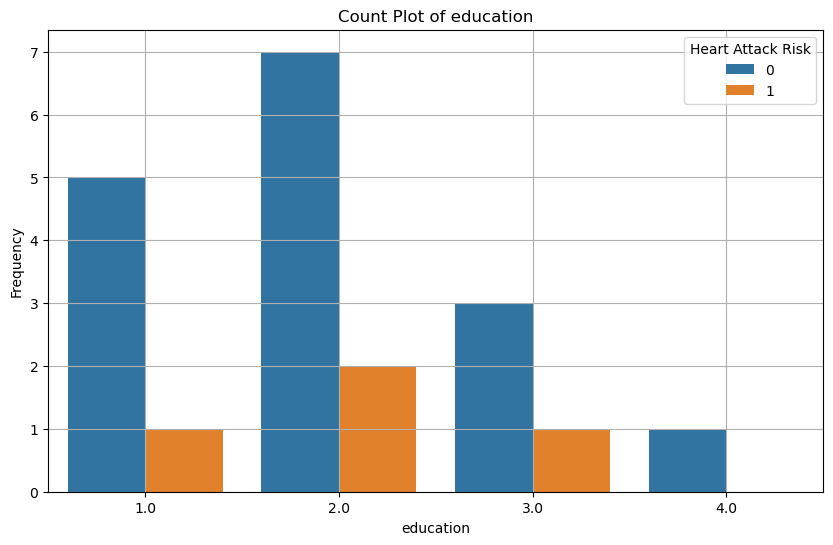

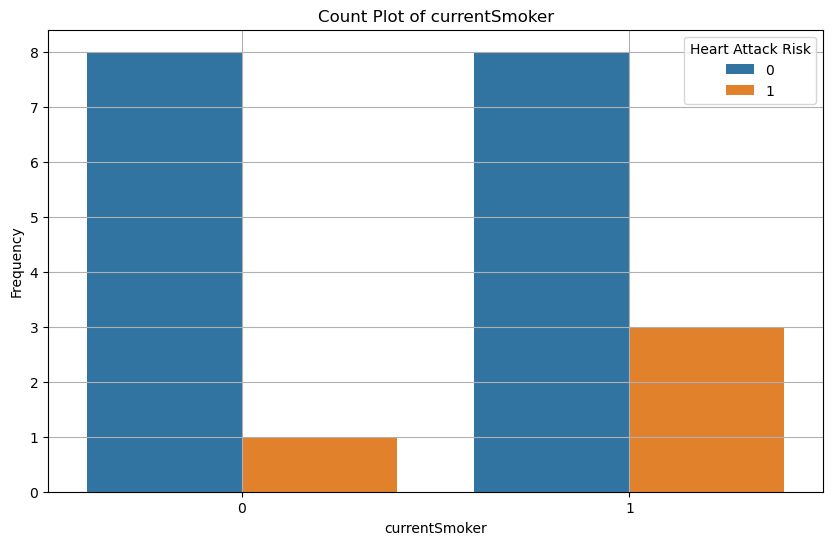

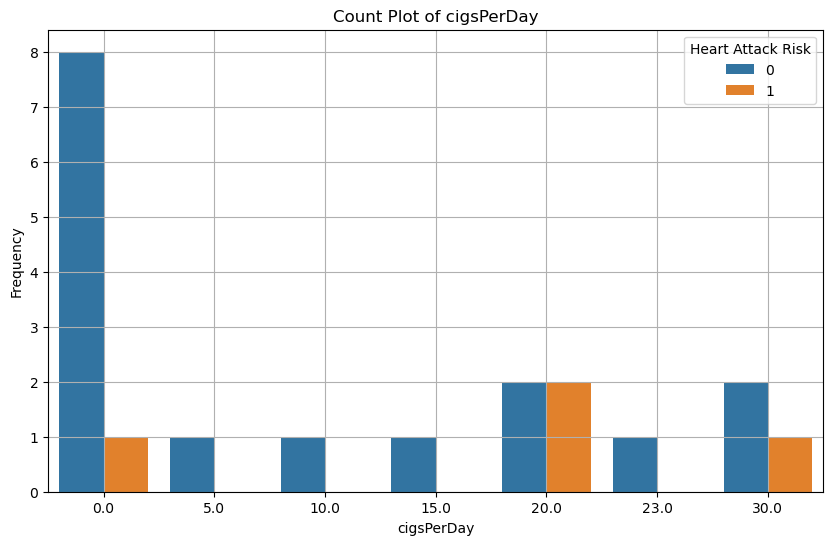

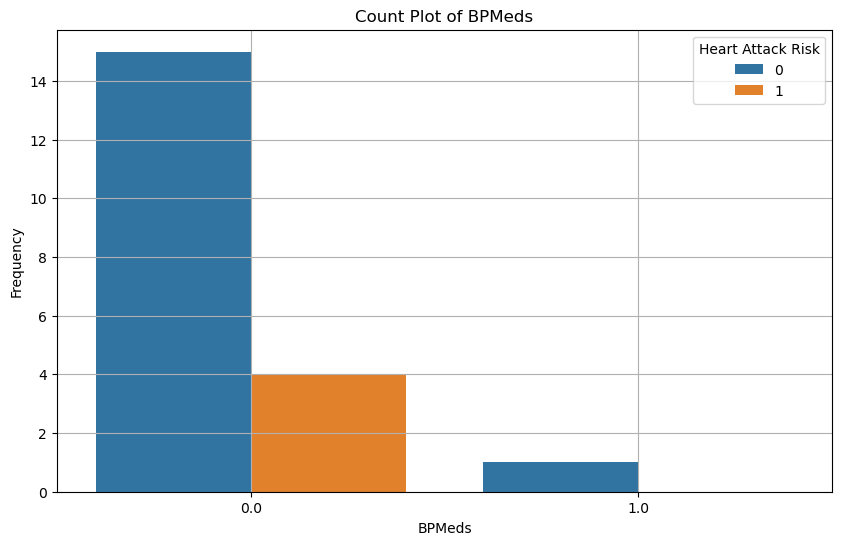

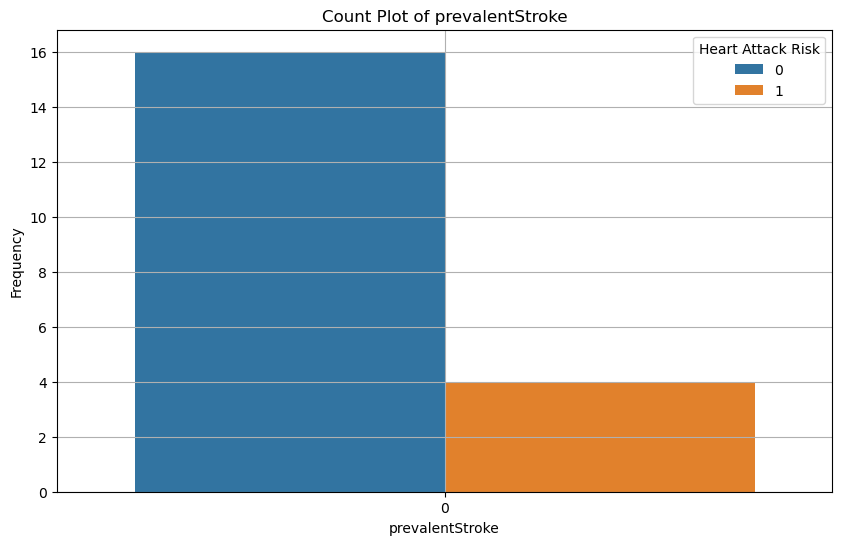

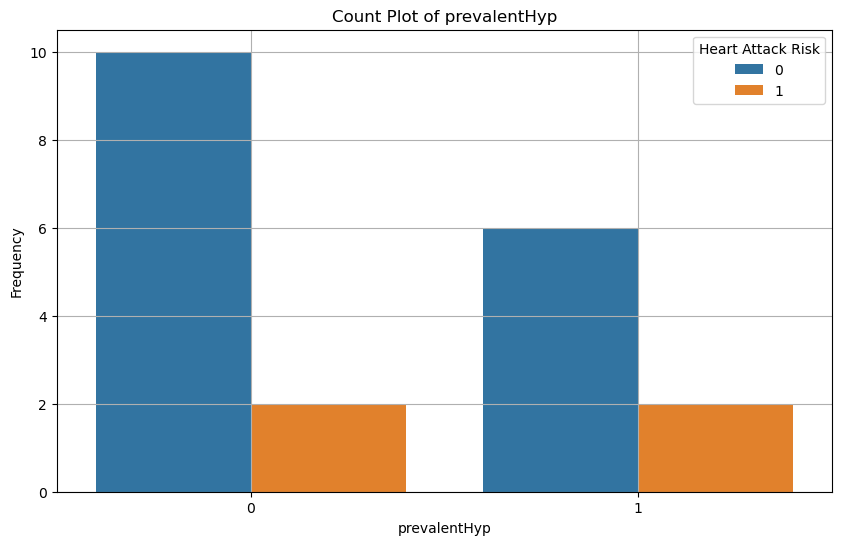

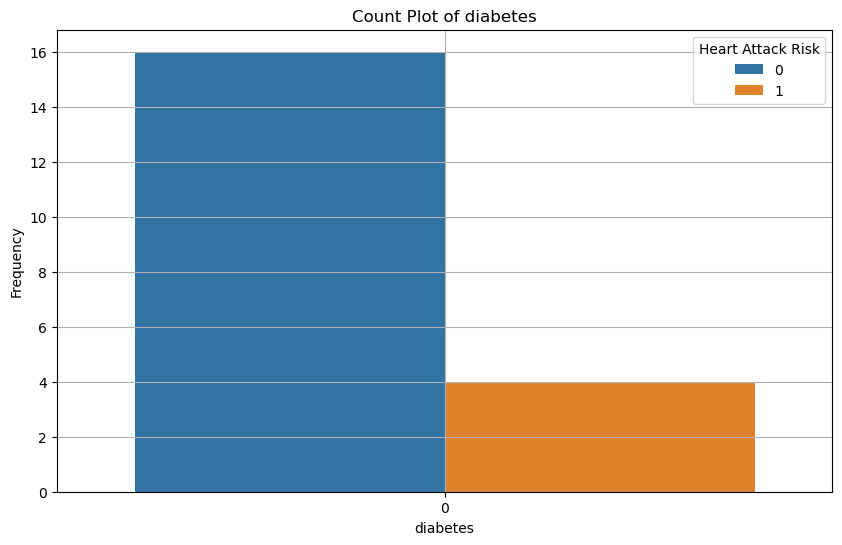

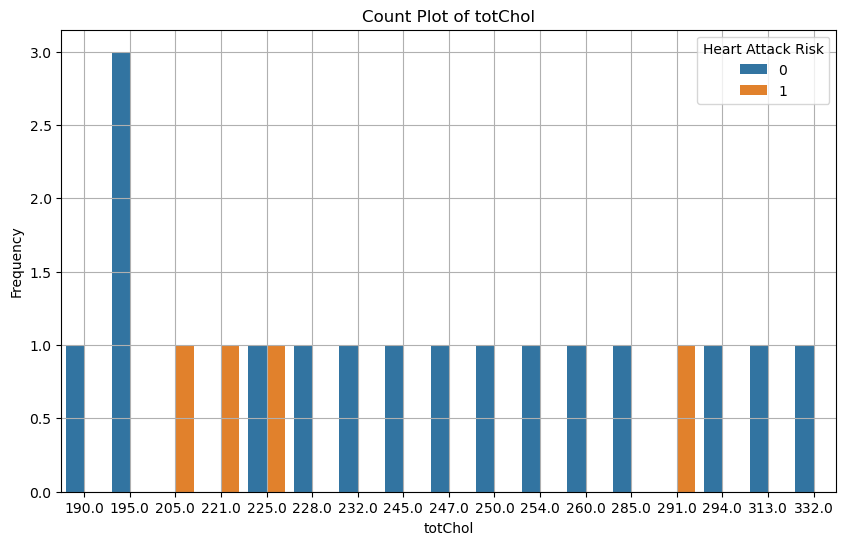

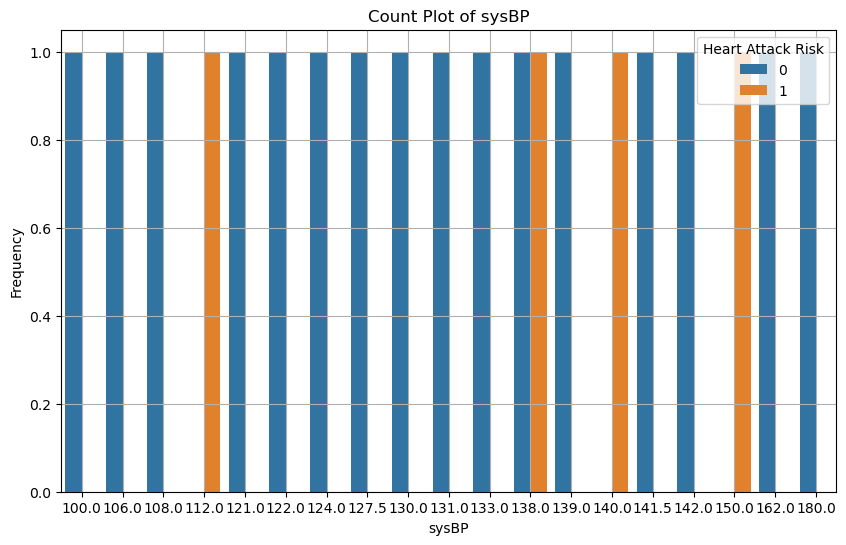

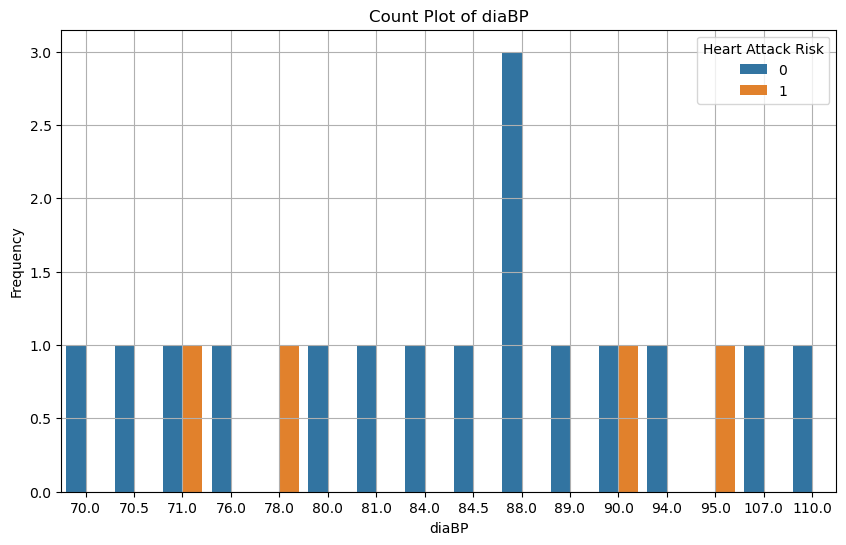

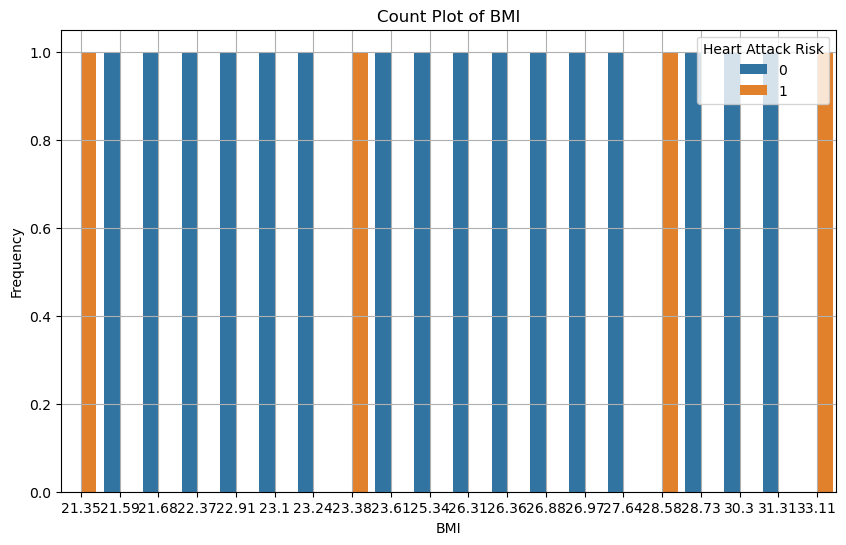

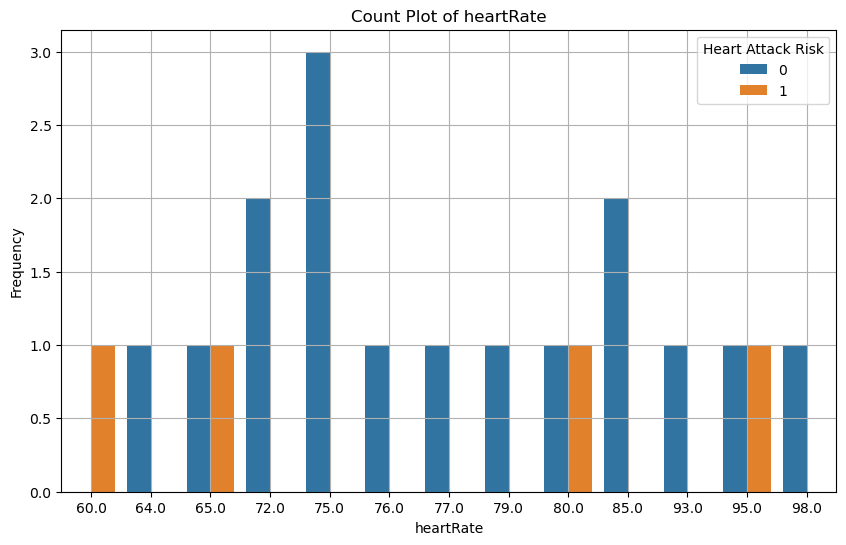

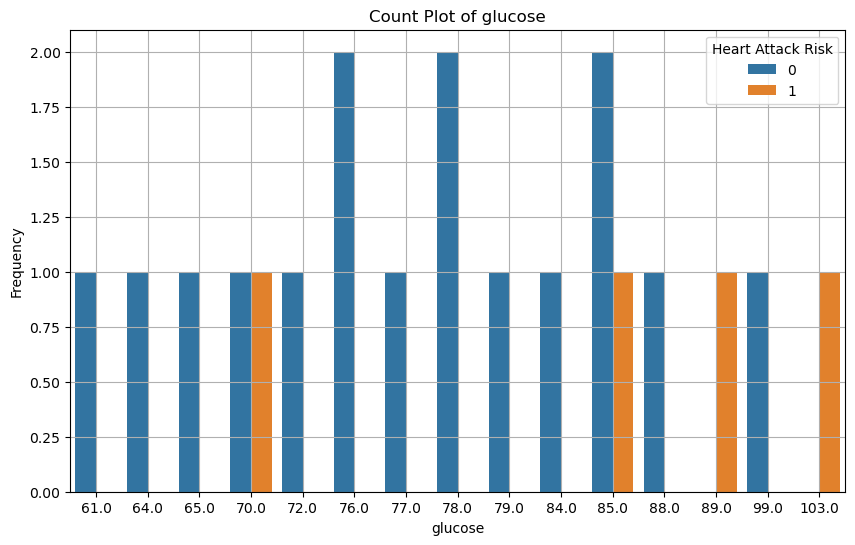

In [75]:
# Assuming df is your dataframe and 'TenYearCHD' is the target column
categorical_list = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
                    'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 
                    'diaBP', 'BMI', 'heartRate', 'glucose']

data_sample = df.head(20)
for i in categorical_list:
    plt.figure(figsize=(10, 6))
    
    # Use df instead of categorical_list in the countplot function
    sns.countplot(x=i, data=data_sample, hue="TenYearCHD")
    
    plt.title(f'Count Plot of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.legend(title='Heart Attack Risk')
    plt.grid(True)
    plt.show()


### Box Plot Analysis

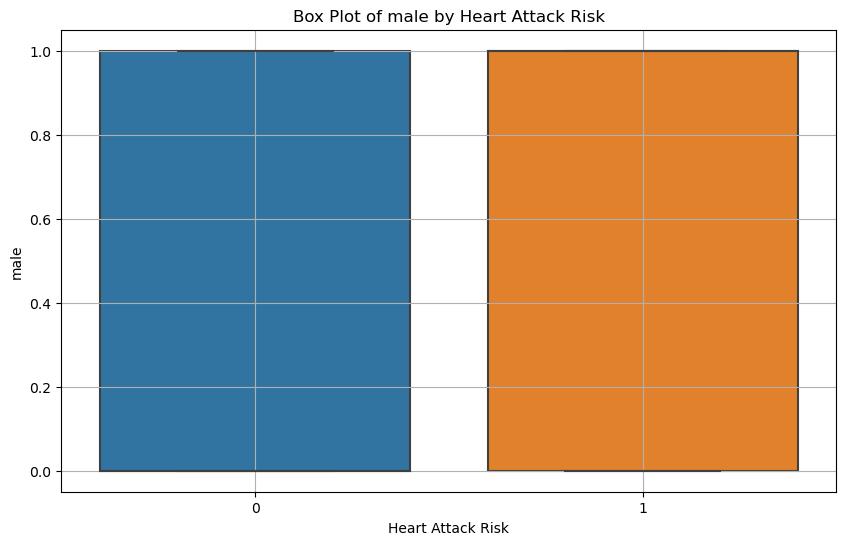

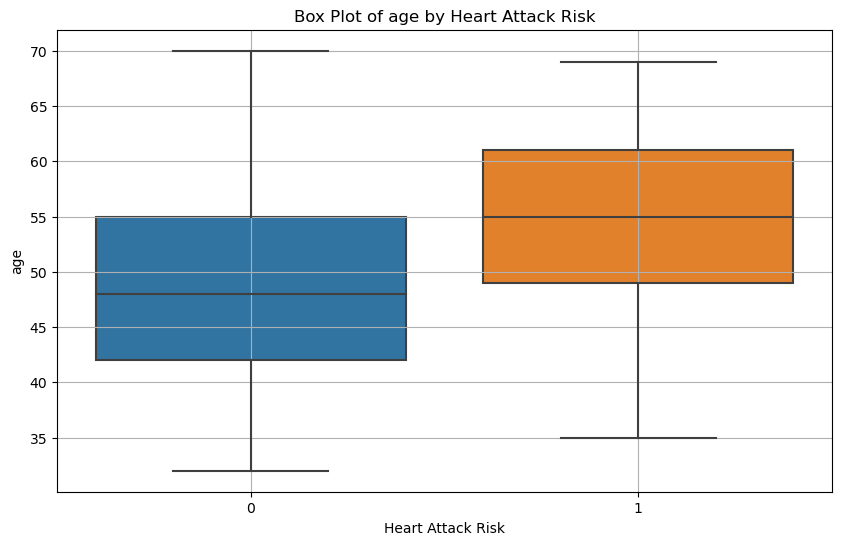

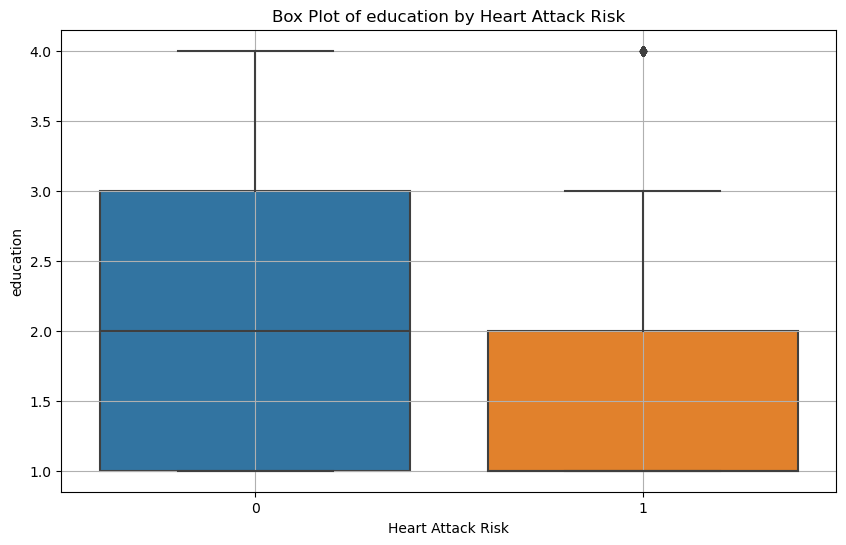

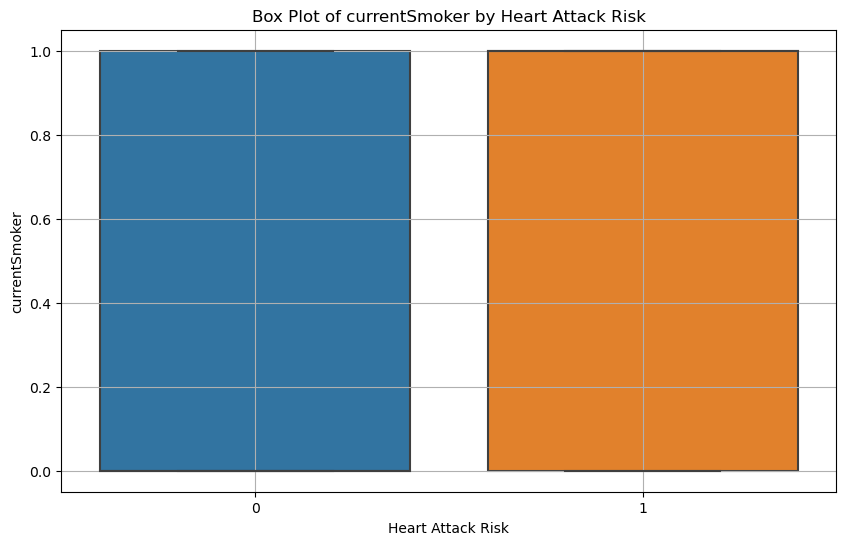

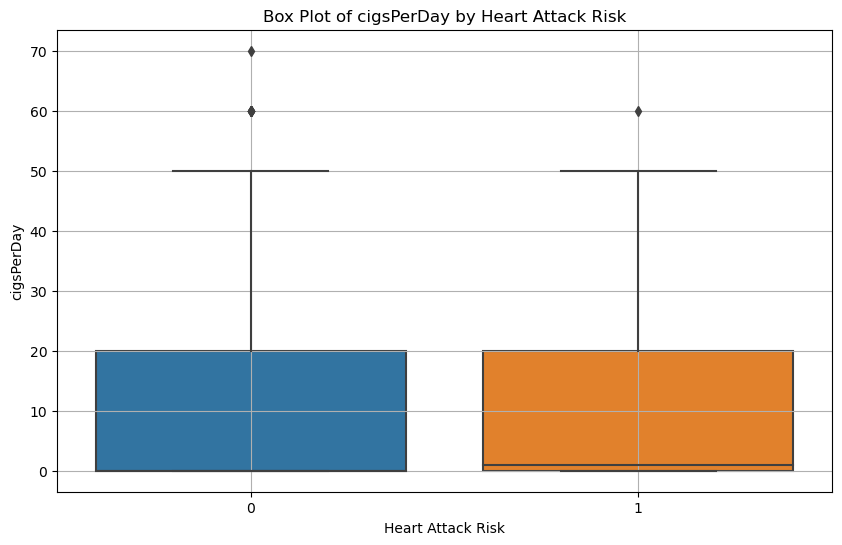

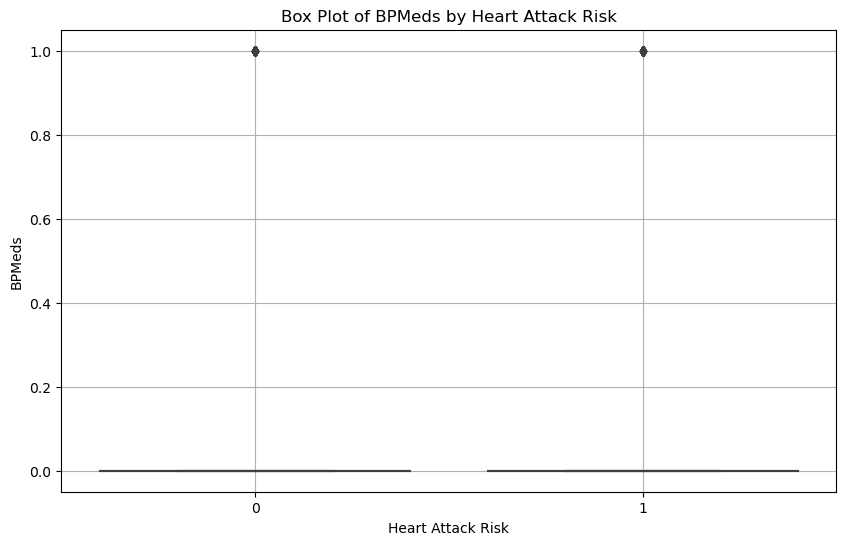

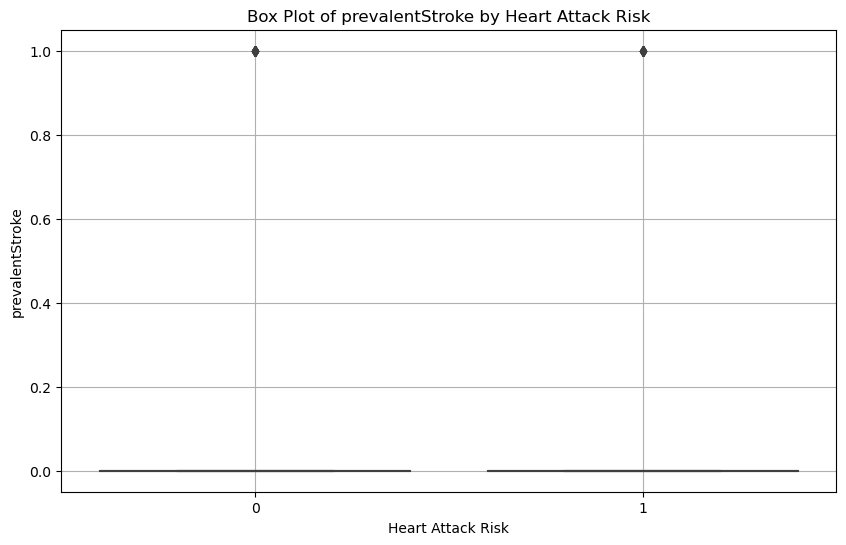

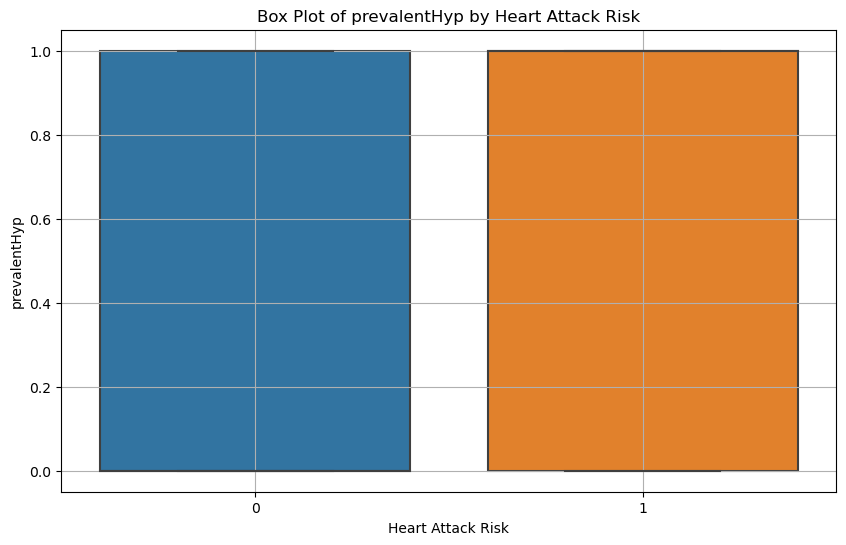

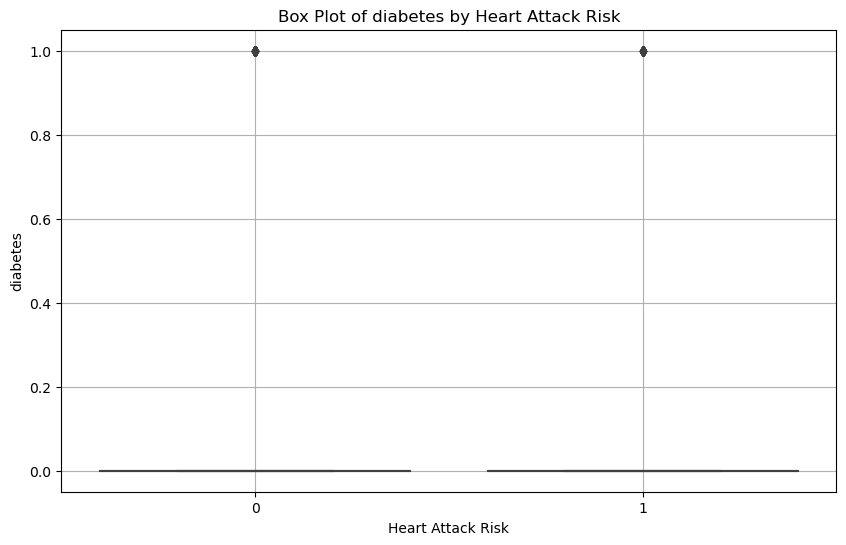

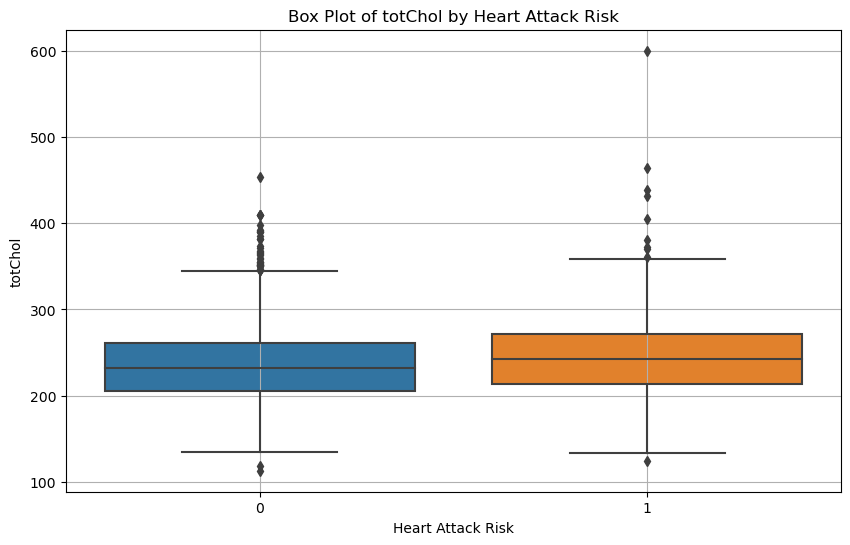

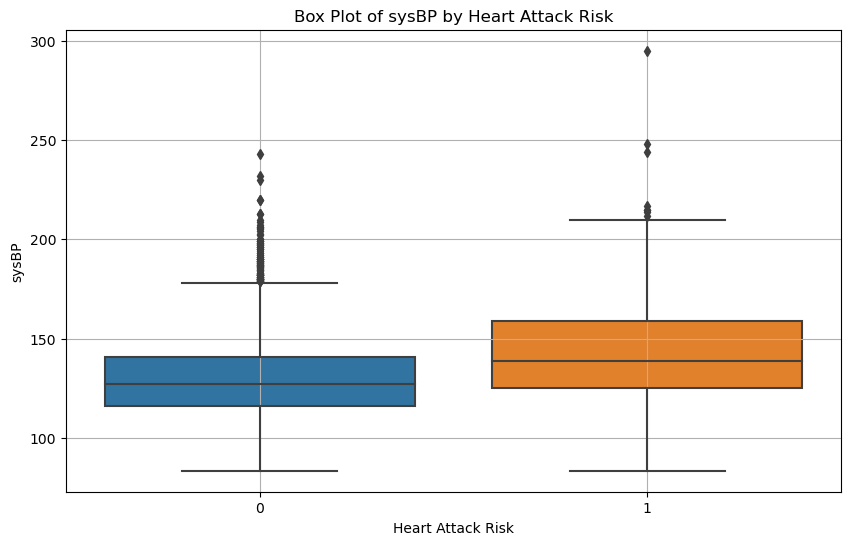

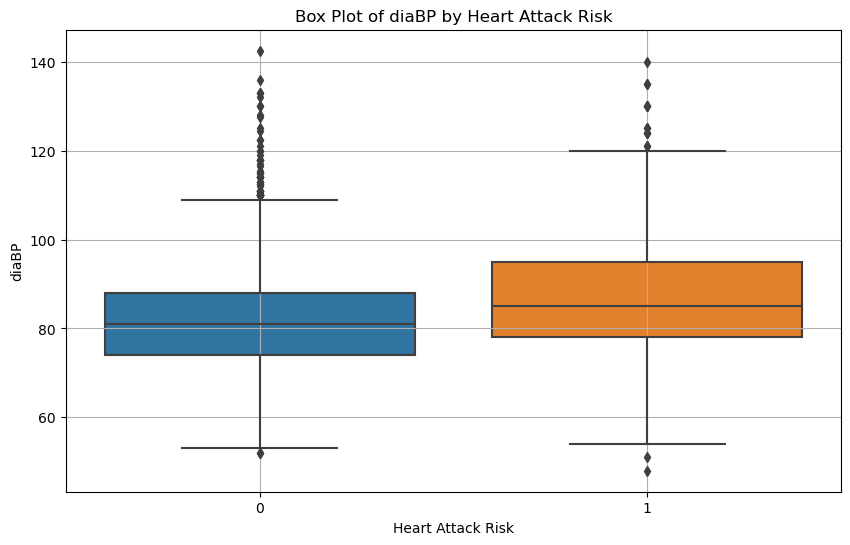

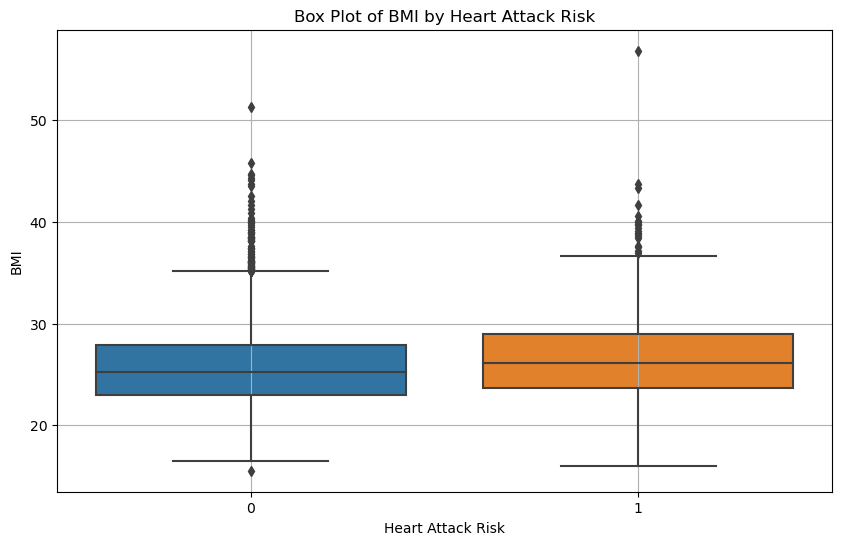

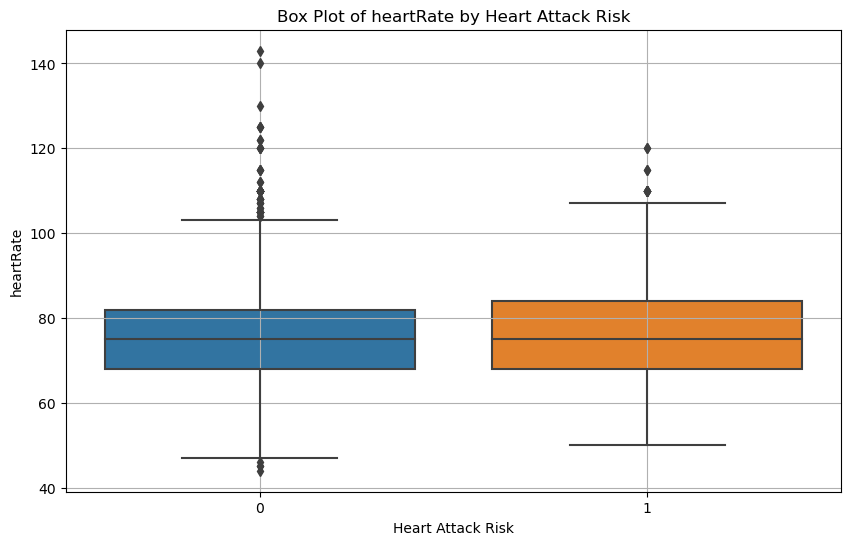

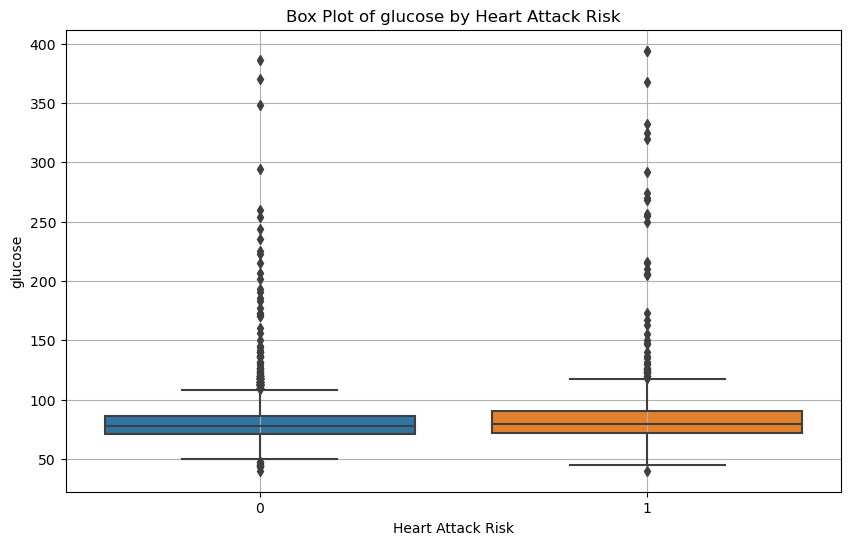

In [76]:
# Assuming the target variable is 'TenYearCHD'
for feature in categorical_list:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='TenYearCHD', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Heart Attack Risk')
    plt.xlabel('Heart Attack Risk')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()
